# Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
#sns.set_palette("rocket")

HEIGHT = 3
ASPECT = 2

## Baseline Methods

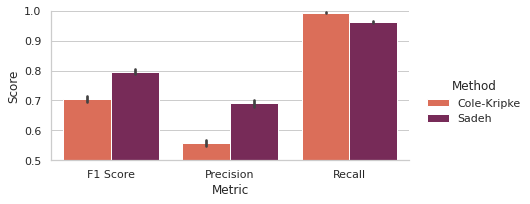

In [2]:
data = pd.read_csv("results/exp01_baseline.csv")
data = data.groupby(["Method", "Fold"])[['Accuracy', 'Precision', 'Recall', 'F1 Score']].aggregate("mean").reset_index()

scores = pd.melt(data, id_vars=['Method'],
                 value_vars=['F1 Score', 'Precision', 'Recall'],
                 var_name='Metric', value_name='Score')

g = sns.catplot(x="Metric", y="Score", hue="Method", kind="bar", data=scores, height=HEIGHT, aspect=ASPECT, palette = 'rocket_r')
g.set(ylim=(.5,1))

plt.tight_layout(rect=(0,0,.8,1))

## Count Models

### Hyperparameters

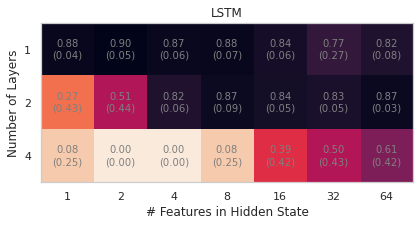

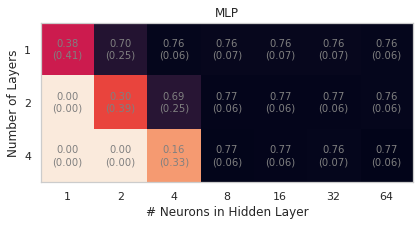

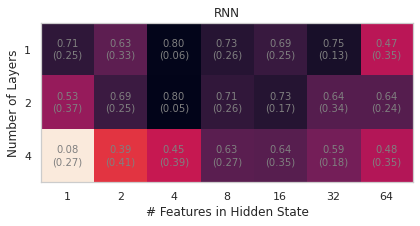

In [3]:
data = pd.read_csv("results/exp04_test.csv")

data = data[['Fold', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
             'Hidden Dimension', 'Number of Layers', 'Initial Learning Rate',
             'Model', 'Ellapsed Time']]
data.loc[:,"# Features in Hidden State"] = data["Hidden Dimension"]


tmp = data.loc[data["Model"] != "GLM", :]
scores = pd.melt(tmp, id_vars=["Fold", "# Features in Hidden State", 'Number of Layers', 'Model'],
               value_vars=['F1 Score', 'Precision', 'Recall'],
               var_name='Metric', value_name='Score')

agg = scores.groupby(["# Features in Hidden State", 'Number of Layers', 'Metric', 'Model'])["Score"].aggregate(["mean","std"]).reset_index()
agg = agg.sort_values(by=["Model", 'Number of Layers', "# Features in Hidden State"])

agg = agg.loc[agg["Metric"] == "F1 Score",:].reset_index(drop=True)


for model in agg["Model"].unique():
    tmp = agg.loc[(agg["Model"] == model), :]

    n_layers = tmp["Number of Layers"].unique()
    hid_dim = tmp["# Features in Hidden State"].unique()

    means = tmp.pivot(index="Number of Layers", columns="# Features in Hidden State", values="mean").values
    stds = tmp.pivot(index="Number of Layers", columns="# Features in Hidden State", values="std").values

    fig = plt.figure(figsize=(HEIGHT * 2, 2 * HEIGHT * ASPECT))
    ax = plt.subplot(1, 1, 1)
    ax.grid(False)
    im = ax.imshow(means, cmap="rocket_r")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(hid_dim)))
    ax.set_yticks(np.arange(len(n_layers)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(hid_dim)
    ax.set_yticklabels(n_layers)

    plt.xlabel('# Features in Hidden State') if model != "MLP" else plt.xlabel('# Neurons in Hidden Layer')
    plt.ylabel('Number of Layers')

    # Loop over data dimensions and create text annotations.
    for i in range(len(n_layers)):
        for j in range(len(hid_dim)):
            text = ax.text(j, i, f"{means[i, j]:.2f}\n({stds[i, j]:.2f})",
                           ha="center", va="center", color="grey", size=10)

    ax.set_title(model)
    plt.tight_layout()

### Best models

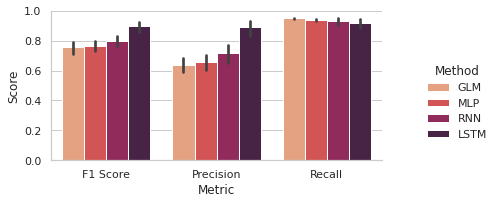

In [4]:
data = pd.read_csv("results/exp04_test.csv")
data = data[['Fold', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
             'Hidden Dimension', 'Number of Layers', 'Initial Learning Rate',
             'Model', 'Ellapsed Time']]
data.loc[:, "Method"] = data["Model"]

# Select columns of interest
columns = ['Fold', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Method']

# Get best models (see plots above)
count_glm = data.loc[data["Method"] == "GLM", columns]
best_count_mlp = data.loc[(data["Method"] == "MLP") & (data["Number of Layers"] == 2) & (data["Hidden Dimension"] == 8), columns]
best_count_rnn = data.loc[(data["Method"] == "RNN") & (data["Number of Layers"] == 1) & (data["Hidden Dimension"] == 4), columns]
best_count_lstm = data.loc[(data["Method"] == "LSTM") & (data["Number of Layers"] == 1) & (data["Hidden Dimension"] == 2), columns]

# Concat results
best_count_models = pd.concat([count_glm, best_count_mlp, best_count_rnn, best_count_lstm])
best_count_models = pd.melt(best_count_models, id_vars=['Method'],
                  value_vars=['F1 Score', 'Precision', 'Recall'],
                  var_name='Metric', value_name='Score')

# Plot results
g = sns.catplot(x="Metric", y="Score", hue="Method", kind="bar", data=best_count_models, height=HEIGHT, aspect=ASPECT, palette = 'rocket_r')
g.set(ylim=(0,1))
plt.tight_layout(rect=(0,0,.8,1))

## Triaxial Models

### Hyperparameters

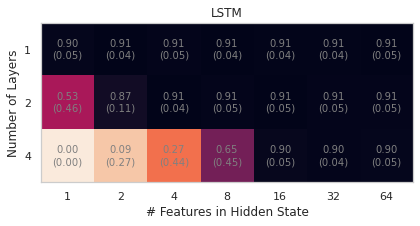

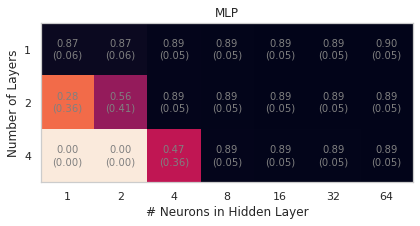

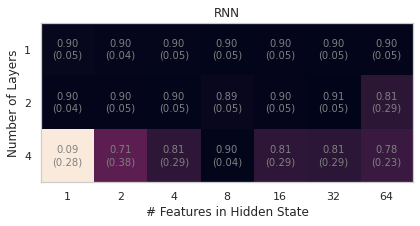

In [5]:
data = pd.read_csv("results/exp02_test.csv")

data = data[['Fold', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
             'Hidden Dimension', 'Number of Layers', 'Initial Learning Rate',
             'Model', 'Ellapsed Time']]
data.loc[:,"# Features in Hidden State"] = data["Hidden Dimension"]


tmp = data.loc[data["Model"] != "GLM", :]
scores = pd.melt(tmp, id_vars=["Fold", "# Features in Hidden State", 'Number of Layers', 'Model'],
               value_vars=['F1 Score', 'Precision', 'Recall'],
               var_name='Metric', value_name='Score')

agg = scores.groupby(["# Features in Hidden State", 'Number of Layers', 'Metric', 'Model'])["Score"].aggregate(["mean","std"]).reset_index()
agg = agg.sort_values(by=["Model", 'Number of Layers', "# Features in Hidden State"])

agg = agg.loc[agg["Metric"] == "F1 Score",:].reset_index(drop=True)


for model in agg["Model"].unique():
    tmp = agg.loc[(agg["Model"] == model), :]

    n_layers = tmp["Number of Layers"].unique()
    hid_dim = tmp["# Features in Hidden State"].unique()

    means = tmp.pivot(index="Number of Layers", columns="# Features in Hidden State", values="mean").values
    stds = tmp.pivot(index="Number of Layers", columns="# Features in Hidden State", values="std").values

    fig = plt.figure(figsize=(HEIGHT * 2, 2 * HEIGHT * ASPECT))
    ax = plt.subplot(1, 1, 1)
    ax.grid(False)
    im = ax.imshow(means, cmap="rocket_r")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(hid_dim)))
    ax.set_yticks(np.arange(len(n_layers)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(hid_dim)
    ax.set_yticklabels(n_layers)

    plt.xlabel('# Features in Hidden State') if model != "MLP" else plt.xlabel('# Neurons in Hidden Layer')
    plt.ylabel('Number of Layers')

    # Loop over data dimensions and create text annotations.
    for i in range(len(n_layers)):
        for j in range(len(hid_dim)):
            text = ax.text(j, i, f"{means[i, j]:.2f}\n({stds[i, j]:.2f})",
                           ha="center", va="center", color="grey", size=10)

    ax.set_title(model)
    plt.tight_layout()

### Best models

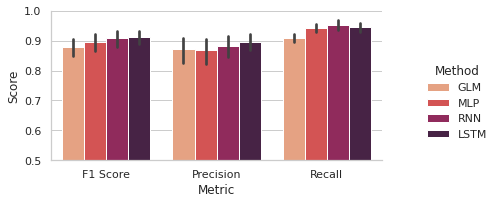

In [6]:
data = pd.read_csv("results/exp02_test.csv")
data = data[['Fold', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
             'Hidden Dimension', 'Number of Layers', 'Initial Learning Rate',
             'Model', 'Ellapsed Time']]
data.loc[:, "Method"] = data["Model"]

# Select columns of interest
columns = ['Fold', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Method']

# Get best models (see plots above)
raw_glm = data.loc[data["Method"] == "GLM", columns]
best_raw_mlp = data.loc[(data["Method"] == "MLP") & (data["Number of Layers"] == 1) & (data["Hidden Dimension"] == 64), columns]
best_raw_rnn = data.loc[(data["Method"] == "RNN") & (data["Number of Layers"] == 2) & (data["Hidden Dimension"] == 32), columns]
best_raw_lstm = data.loc[(data["Method"] == "LSTM") & (data["Number of Layers"] == 1) & (data["Hidden Dimension"] == 2), columns]

# Concat results
best_raw_models = pd.concat([raw_glm, best_raw_mlp, best_raw_rnn, best_raw_lstm])
best_raw_models = pd.melt(best_raw_models, id_vars=['Method'],
                  value_vars=['F1 Score', 'Precision', 'Recall'],
                  var_name='Metric', value_name='Score')

# Plot results
g = sns.catplot(x="Metric", y="Score", hue="Method", kind="bar", data=best_raw_models, height=HEIGHT, aspect=ASPECT, palette = 'rocket_r')
g.set(ylim=(.5,1))
plt.tight_layout(rect=(0,0,.8,1))

## Powerspec Models

### Hyperparameters

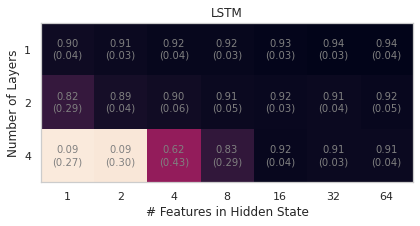

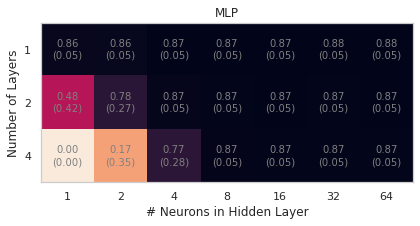

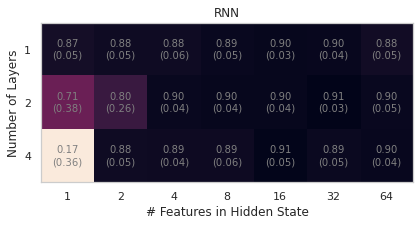

In [7]:
data = pd.read_csv("results/exp03_test.csv")

data = data[['Fold', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
             'Hidden Dimension', 'Number of Layers', 'Initial Learning Rate',
             'Model', 'Ellapsed Time']]
data.loc[:,"# Features in Hidden State"] = data["Hidden Dimension"]


tmp = data.loc[data["Model"] != "GLM", :]
scores = pd.melt(tmp, id_vars=["Fold", "# Features in Hidden State", 'Number of Layers', 'Model'],
               value_vars=['F1 Score', 'Precision', 'Recall'],
               var_name='Metric', value_name='Score')

agg = scores.groupby(["# Features in Hidden State", 'Number of Layers', 'Metric', 'Model'])["Score"].aggregate(["mean","std"]).reset_index()
agg = agg.sort_values(by=["Model", 'Number of Layers', "# Features in Hidden State"])

agg = agg.loc[agg["Metric"] == "F1 Score",:].reset_index(drop=True)


for model in agg["Model"].unique():
    tmp = agg.loc[(agg["Model"] == model), :]

    n_layers = tmp["Number of Layers"].unique()
    hid_dim = tmp["# Features in Hidden State"].unique()

    means = tmp.pivot(index="Number of Layers", columns="# Features in Hidden State", values="mean").values
    stds = tmp.pivot(index="Number of Layers", columns="# Features in Hidden State", values="std").values

    fig = plt.figure(figsize=(HEIGHT * 2, 2 * HEIGHT * ASPECT))
    ax = plt.subplot(1, 1, 1)
    ax.grid(False)
    im = ax.imshow(means, cmap="rocket_r")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(hid_dim)))
    ax.set_yticks(np.arange(len(n_layers)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(hid_dim)
    ax.set_yticklabels(n_layers)

    plt.xlabel('# Features in Hidden State') if model != "MLP" else plt.xlabel('# Neurons in Hidden Layer')
    plt.ylabel('Number of Layers')

    # Loop over data dimensions and create text annotations.
    for i in range(len(n_layers)):
        for j in range(len(hid_dim)):
            text = ax.text(j, i, f"{means[i, j]:.2f}\n({stds[i, j]:.2f})",
                           ha="center", va="center", color="grey", size=10)

    ax.set_title(model)
    plt.tight_layout()

### Best models

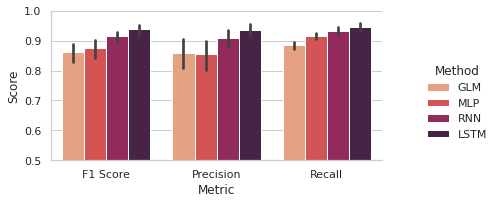

In [8]:
data = pd.read_csv("results/exp03_test.csv")
data = data[['Fold', 'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
             'Hidden Dimension', 'Number of Layers', 'Initial Learning Rate',
             'Model', 'Ellapsed Time']]
data.loc[:, "Method"] = data["Model"]

# Select columns of interest
columns = ['Fold', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Method']

# Get best models (see plots above)
freq_glm = data.loc[data["Method"] == "GLM", columns]
best_freq_mlp = data.loc[(data["Method"] == "MLP") & (data["Number of Layers"] == 1) & (data["Hidden Dimension"] == 32), columns]
best_freq_rnn = data.loc[(data["Method"] == "RNN") & (data["Number of Layers"] == 2) & (data["Hidden Dimension"] == 32), columns]
best_freq_lstm = data.loc[(data["Method"] == "LSTM") & (data["Number of Layers"] == 1) & (data["Hidden Dimension"] == 32), columns]


# Concat results
best_freq_models = pd.concat([freq_glm, best_freq_mlp, best_freq_rnn, best_freq_lstm])
best_freq_models = pd.melt(best_freq_models, id_vars=['Method'],
                           value_vars=['F1 Score', 'Precision', 'Recall'],
                           var_name='Metric', value_name='Score')

# Plot results
g = sns.catplot(x="Metric", y="Score", hue="Method", kind="bar", data=best_freq_models, height=HEIGHT, aspect=ASPECT, palette = 'rocket_r')
g.set(ylim=(.5,1))
plt.tight_layout(rect=(0,0,.8,1))

## Summary

In [9]:
baseline = pd.read_csv("results/exp01_baseline.csv")
baseline = baseline.groupby(["Method", "Fold"])[['Accuracy', 'Precision', 'Recall', 'F1 Score']].aggregate("mean").reset_index()
baseline.loc[:, "Input"] = "Traditional"

best_count_models = pd.concat([count_glm, best_count_mlp, best_count_rnn, best_count_lstm]).reset_index()
best_count_models.loc[:, "Input"] = "Counts"

best_raw_models = pd.concat([raw_glm, best_raw_mlp, best_raw_rnn, best_raw_lstm]).reset_index()
best_raw_models.loc[:, "Input"] = "Raw Data"

best_freq_models = pd.concat([freq_glm, best_freq_mlp, best_freq_rnn, best_freq_lstm]).reset_index()
best_freq_models.loc[:, "Input"] = "Frequency Features"

best_models = pd.concat([baseline, best_count_models, best_raw_models, best_freq_models]).reset_index()
best_models = best_models[["Method", "Fold", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Input']]

### LaTeX result table

In [10]:
# Define order of elements
method_order = {'Cole-Kripke': 0, 'Sadeh': 1, 'GLM': 2, 'MLP': 3, 'RNN': 4, 'LSTM': 5} 
input_order = {'Traditional': 0, 'Counts': 1, 'Raw Data': 2, 'Frequency Features': 3}

def ci(df):
    return df.std()/np.sqrt(df.shape[0])

def summary(df):
    return f"${df.mean():.2f} \pm {ci(df):.2f}"

# Create summary (mean \pm ci)
agg = best_models.groupby(['Input', 'Method'])[['F1 Score', 'Precision', 'Recall']].aggregate(summary).reset_index()

# Create summary (mean and ci as different columns)
agg = best_models.groupby(['Input', 'Method'])[['F1 Score', 'Precision', 'Recall']].aggregate(["mean", ci]).reset_index()
agg = agg.sort_values('Method', key=lambda x: x.map(method_order))
agg = agg.sort_values('Input', key=lambda x: x.map(input_order))
agg = agg.reset_index(drop=True)

# Create LaTeX table
print(agg.round(2).to_latex(index=False, escape=False))

\begin{tabular}{llrrrrrr}
\toprule
             Input &      Method & \multicolumn{2}{l}{F1 Score} & \multicolumn{2}{l}{Precision} & \multicolumn{2}{l}{Recall} \\
                   &     mean &   ci &      mean &   ci &   mean &   ci \\
\midrule
       Traditional & Cole-Kripke &     0.71 & 0.00 &      0.56 & 0.01 &   0.99 & 0.00 \\
       Traditional &       Sadeh &     0.80 & 0.00 &      0.69 & 0.01 &   0.96 & 0.00 \\
            Counts &         GLM &     0.76 & 0.02 &      0.64 & 0.03 &   0.95 & 0.00 \\
            Counts &         MLP &     0.77 & 0.02 &      0.66 & 0.03 &   0.94 & 0.00 \\
            Counts &         RNN &     0.80 & 0.02 &      0.71 & 0.03 &   0.93 & 0.01 \\
            Counts &        LSTM &     0.90 & 0.02 &      0.89 & 0.03 &   0.92 & 0.02 \\
          Raw Data &         GLM &     0.88 & 0.01 &      0.87 & 0.02 &   0.91 & 0.01 \\
          Raw Data &         MLP &     0.90 & 0.02 &      0.87 & 0.02 &   0.94 & 0.01 \\
          Raw Data &         RNN &     0.

### Plot of best methods

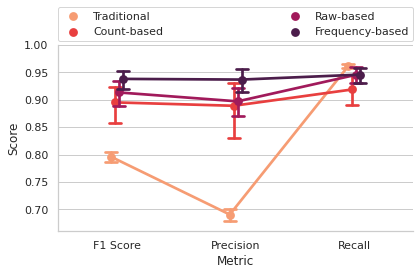

In [11]:
best_baseline = baseline.loc[baseline["Method"] == "Sadeh", :].reset_index()
best_baseline.loc[:, "Input"] = "Traditional"
best_count_lstm.loc[:, "Input"] = "Count-based"
best_raw_lstm.loc[:, "Input"] = "Raw-based"
best_freq_lstm.loc[:, "Input"] = "Frequency-based"

results = pd.concat([best_baseline, best_count_lstm, best_raw_lstm, best_freq_lstm])
results = pd.melt(results, id_vars=['Input'],
                  value_vars=['F1 Score', 'Precision', 'Recall'],
                  var_name='Metric', value_name='Score')

# Plot results
g = sns.catplot(x="Metric", y="Score", hue="Input", kind="point", data=results, 
                height=4, aspect=1.5, palette = 'rocket_r', legend=False, capsize=.1,
                dodge=True,)
g.set(ylim=(.66,1))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

#plt.legend(bbox_to_anchor=(0, -.5), loc=2)
plt.tight_layout()

### Only F1 score of the best methods

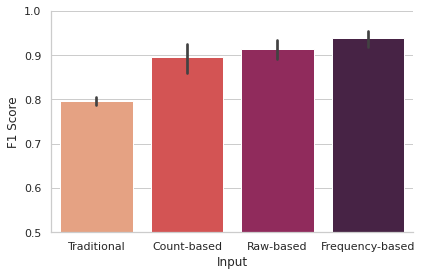

In [12]:
results = pd.concat([best_baseline, best_count_lstm, best_raw_lstm, best_freq_lstm])

# Plot results
g = sns.catplot(x="Input", y="F1 Score", kind="bar", data=results, height=4, aspect=1.5, palette = 'rocket_r')
g.set(ylim=(.5,1))
plt.tight_layout()